# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 - Box plot: It looks like the mice treated with Capomulin and Ramicane had smaller tumors compared to those treated with Infubinol and Ceftamin. This may suggest that Capomulin and Ramicane might be more effective in reducing tumor size.
 - Line Plot for Single Mouse: Each time you run the code, a different mouse treated with Capomulin is randomly selected, and the line plot shows how the tumor volume changes over time for that specific mouse. Generally, I notice that the tumor volume tends to decrease even in single random samples, indicating Capomulin’s effectiveness in reducing tumor size for that particular mouse.
 - Weight & Tumor Correlation: The scatter plot shows that heavier mice generally have larger tumor volumes. There’s a pretty strong positive correlation (r=0.84) there, which likely means that as mouse weight increases, tumor size does as well.

In [178]:
%matplotlib inline

In [179]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mousedata=pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

#Reorder the Columns
new_column_order = ['Mouse ID','Timepoint','Tumor Volume (mm3)','Metastatic Sites','Drug Regimen','Sex','Age_months','Weight (g)']
mousedata=mousedata[new_column_order]

# Display the data table for preview
mousedata.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [180]:
# Checking the number of mice.
mousedata["Mouse ID"].nunique()

249

In [181]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse_IDs = mousedata[mousedata.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]["Mouse ID"].unique()
duplicate_mouse_IDs

array(['g989'], dtype=object)

In [182]:
# Optional: Get all the data for the duplicate mouse ID.
mousedataunique=mousedata.loc[mousedata["Mouse ID"]== 'g989']
mousedataunique

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [183]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mousedataclean = mousedata[mousedata["Mouse ID"]!='g989']
mousedataclean.reset_index()
mousedataclean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [184]:
# Checking the number of mice in the clean DataFrame.
mousedataclean["Mouse ID"].nunique()


248

## Summary Statistics

In [185]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean_volume = mousedataclean.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_volume = mousedataclean.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_volume = mousedataclean.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stddev_volume = mousedataclean.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_volume = mousedataclean.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


# Assemble the resulting series into a single summary DataFrame.

mouse_stats_table = pd.DataFrame({
    "Mean Tumor Volume": mean_volume,
    "Median Tumor Volume": median_volume,
    "Tumor Volume Variance": variance_volume,
    "Tumor Volume Std. Dev.": stddev_volume,
    "Tumor Volume Std. Err.": sem_volume,
})

mouse_stats_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [186]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
mouse_stats_table2=mousedataclean.groupby("Drug Regimen").agg(
    mean=("Tumor Volume (mm3)", "mean"),
    median=("Tumor Volume (mm3)", "median"),
    var=("Tumor Volume (mm3)", "var"),
    std=("Tumor Volume (mm3)", "std"),
    sem=("Tumor Volume (mm3)", "sem")
)
mouse_stats_table2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

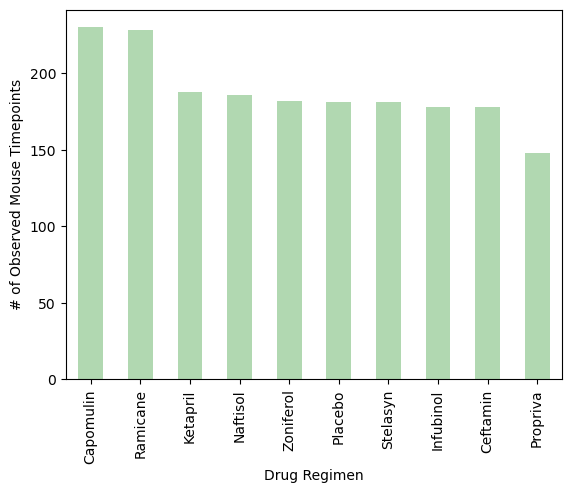

In [187]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoints_for_bar= mousedataclean["Drug Regimen"].value_counts()

timepoints_for_bar.plot(kind='bar', color='g', alpha=0.306958)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

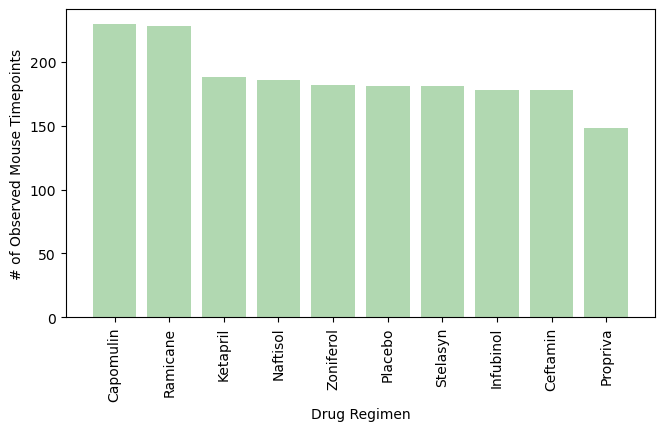

In [188]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
timepoints_for_bar= mousedataclean["Drug Regimen"].value_counts()

plt.figure(figsize=(7.6,4))
plt.bar(timepoints_for_bar.index, timepoints_for_bar, color='g', alpha=0.306958, align="center")
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()


<Axes: ylabel='count'>

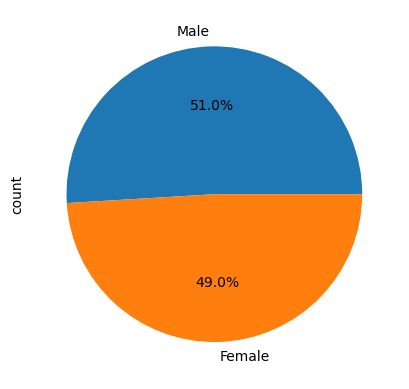

In [189]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
sex_counts=mousedataclean["Sex"].value_counts()

# Make the pie chart
sex_counts.plot.pie(autopct='%1.1f%%', startangle=0)


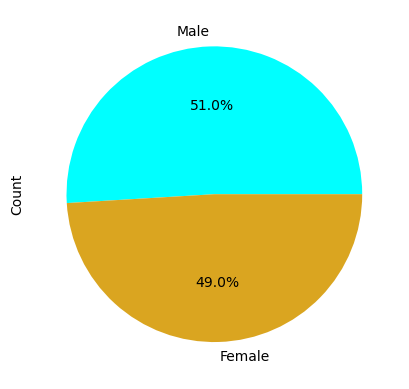

In [190]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
labels=mousedataclean["Sex"].unique()
sizes = mousedataclean["Sex"].value_counts()
colors=["aqua","goldenrod"]

# Make the pie chart
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%",  startangle=0)
plt.ylabel('Count')
plt.show()

## Quartiles, Outliers and Boxplots

In [191]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatestlist = mousedataclean.groupby('Mouse ID')["Timepoint"].max().reset_index()
greatestlist
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_timepoint_mouse_data=pd.merge(greatestlist, mousedataclean, on=['Mouse ID','Timepoint'],how='left')
max_timepoint_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [192]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Dictionary to store outliers for each treatment
outlierlist = {}

#Create a dictionary to store data for box plot
boxplotitems=[]
    
    


# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatmentrows = max_timepoint_mouse_data[max_timepoint_mouse_data['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    
    #Store Data for Plot
    boxplotitems.append(treatmentrows)

    # Calculate the IQR
    quartiles = treatmentrows.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    # Identify outliers
    outliers = treatmentrows[(treatmentrows < lower_bound) | (treatmentrows > upper_bound)]
    
    # Store outliers in dictionary
    outlierlist[drug] = outliers

# Print the outliers in a readable format with Series metadata
for treatment, outliers in outlierlist.items():
    print(f"{treatment}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


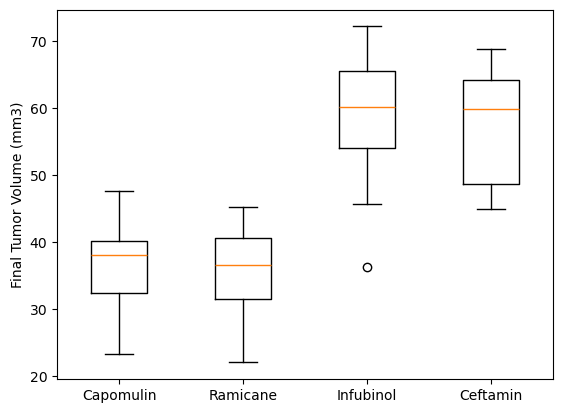

In [193]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

fig, ax = plt.subplots()
ax.boxplot(boxplotitems, labels=treatments,)
ax.set_ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

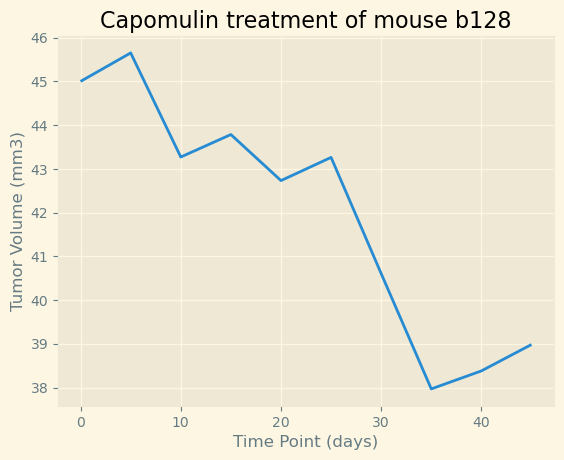

In [219]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#Filter Data for a Single Mouse from mousedataclean
capomulin_data = mousedataclean[mousedataclean['Drug Regimen']=='Capomulin']

#Get unique mouse ID's and select random mouse ID
capo_mice = capomulin_data['Mouse ID'].unique()
random_mouse = np.random.choice(capo_mice)

#Select random mouse data
random_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == random_mouse]                                                
#Use random mouse in line plot
#set style just for fun
plt.style.use('Solarize_Light2')
plt.plot(random_mouse_data['Timepoint'], random_mouse_data['Tumor Volume (mm3)'])
plt.title(f'Capomulin treatment of mouse {random_mouse}')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')


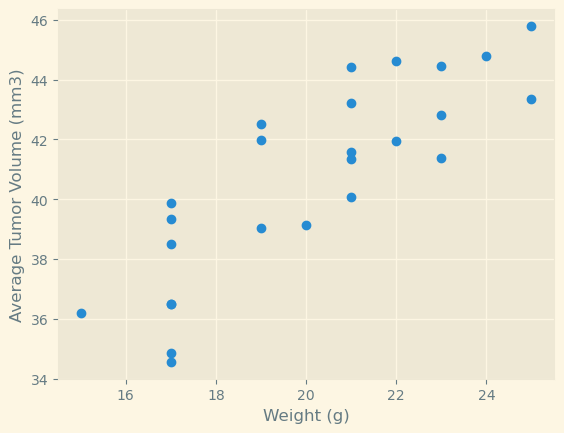

In [213]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

#define x & y values
weight=capomulin_data.groupby('Mouse ID')['Weight (g)'].first()
Volume=capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
#set style just for fun
plt.style.use('Solarize_Light2')
#plot that baby
fig,ax=plt.subplots()
ax.scatter(weight,Volume)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


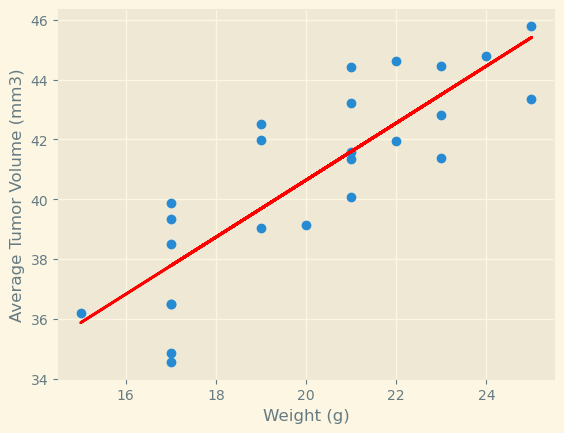

In [227]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation=st.pearsonr(weight,Volume)
pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(weight, Volume)
pe_fit = pe_slope * weight + pe_int

fig,ax=plt.subplots()
ax.scatter(weight,Volume)
plt.plot(weight,pe_fit,"-", color='r')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
plt.show()
